# In this notebook, I will be importing a pizza store dataset from Maven Analytics' website. I will be exploring the dataset to answer some questions about the pizza store. 

In [570]:
# Importing the libaries we will be using in this notebook
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt    
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")

# Importing all the tables

In [571]:
orders = pd.read_csv("/Users/sonamsherpa/Downloads/Pizza+Place+Sales/pizza_sales/orders.csv")
order_details = pd.read_csv("/Users/sonamsherpa/Downloads/Pizza+Place+Sales/pizza_sales/order_details.csv")
pizza = pd.read_csv("/Users/sonamsherpa/Downloads/Pizza+Place+Sales/pizza_sales/pizzas.csv")
pizza_types = pd.read_csv("/Users/sonamsherpa/Downloads/PizzaTypes.csv")

### Looking at the amount of data we have for each table, the order_details table's rows is the max rows we should have when we combine the tables because there is only that many orders. We combing the data based on inner join so we should only return the rows that have same keyword also known as the primary and foreign key.

In [572]:
orders.shape, order_details.shape, pizza.shape, pizza_types.shape

((21350, 3), (48620, 4), (96, 4), (32, 4))

# Merging the data from different tables based on primary key and foreign key

In [573]:
maven = orders.merge(order_details, how="inner", on="order_id")

In [574]:
maven = maven.merge(pizza, how="inner", on = "pizza_id")


In [575]:
maven = maven.merge(pizza_types, how="inner", on= "pizza_type_id")

# Looking at the dataframe after merging the data 

In [576]:
pd.set_option("display.max_columns", None)

In [577]:
maven

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21167,2015-12-27,17:39:57,48176,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,21198,2015-12-28,15:39:02,48244,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,21225,2015-12-29,13:20:17,48311,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,21282,2015-12-31,12:09:59,48456,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [578]:
maven.columns

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')

# To see if there is any Null Values for each columns

In [579]:
maven.isnull().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [580]:
# Checking info about dataframe like what datatypes for each column and how many rows there are
maven.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [581]:
# Converting the date column to date data type
pd.to_datetime(maven["date"])

0       2015-01-01
1       2015-01-02
2       2015-01-03
3       2015-01-03
4       2015-01-04
           ...    
48615   2015-12-27
48616   2015-12-28
48617   2015-12-29
48618   2015-12-31
48619   2015-12-31
Name: date, Length: 48620, dtype: datetime64[ns]

In [582]:
# Lets split the date column into year, month, day in case we want to see group our data by year, month, day
maven[["year", "month", "day"]] = maven["date"].str.split("-", expand=True)

In [583]:
# Spliting the time into hour, minutes and second
maven[["hour", "minutes", "second"]] = maven.time.str.split(":", expand=True)

In [584]:
# What types of pizza sizes are there?
maven["size"].unique()

array(['M', 'S', 'L', 'XL', 'XXL'], dtype=object)

In [585]:
# What types of categories are there?
maven["category"].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [586]:
# How many pizza are there for each type of category? 
category_quantity = maven.groupby("category", as_index=False)["quantity"].sum().sort_values(by="quantity", ascending=False)
category_quantity

,category,quantity
1,Classic,14888
2,Supreme,11987
3,Veggie,11649
0,Chicken,11050


In [587]:
# How many pizza was sold for each size?
maven.groupby("size")["quantity"].sum()

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

In [588]:
# How much sales did each size generate?
maven.groupby("size")["price"].sum()

size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: price, dtype: float64

In [589]:
245409.5-174794.5


70615.0

In [590]:
15635 -14403


1232

#### We can see that even though Medium size pizza only sold 1,232 more pizzas than Small size pizza, the Medium pizza generated $70,615 more than small pizza.

In [591]:
# Converting the updated dataset into csv file.
maven.to_csv("/Users/sonamsherpa/Downloads/mavenpizza/maven.csv")

In [592]:
# How many pizza was sold for each pizza broken down into size
maven.groupby(["name","size"])["quantity"].sum()

name                               size
The Barbecue Chicken Pizza         L        992
                                   M        956
                                   S        484
The Big Meat Pizza                 S       1914
The Brie Carre Pizza               S        490
                                           ... 
The Thai Chicken Pizza             M        481
                                   S        480
The Vegetables + Vegetables Pizza  L        427
                                   M        635
                                   S        464
Name: quantity, Length: 91, dtype: int64

# Which month was the busiest month?

In [593]:
# which month was the most pizza sold?
grouping_by_month=maven.groupby("month",as_index=False)["quantity"].sum()
grouping_by_month.sort_values("quantity", ascending=False)

,month,quantity
6,07,4392
4,05,4328
10,11,4266
2,03,4261
0,01,4232
7,08,4168
3,04,4151
5,06,4107
1,02,3961
11,12,3935


<AxesSubplot: xlabel='month', ylabel='quantity'>

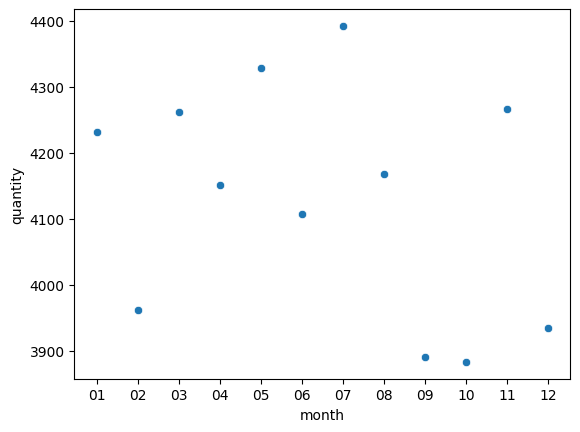

In [594]:
sns.scatterplot(data=grouping_by_month, x= "month", y="quantity")
# We can see the 7th which is July was the busiest month since it sold 4,392 pizzas, while the 10th month which is october was the slowest month with only 3,883 pizzas sold.

# What time was the busiest hour?

In [595]:
quantity_hour_grouped = maven.groupby("hour", as_index=False)["quantity"].sum()
quantity_hour_grouped.sort_values("quantity", ascending= False)

,hour,quantity
3,12,6776
4,13,6413
9,18,5417
8,17,5211
10,19,4406
7,16,4239
5,14,3613
11,20,3534
6,15,3216
2,11,2728


<AxesSubplot: xlabel='hour', ylabel='quantity'>

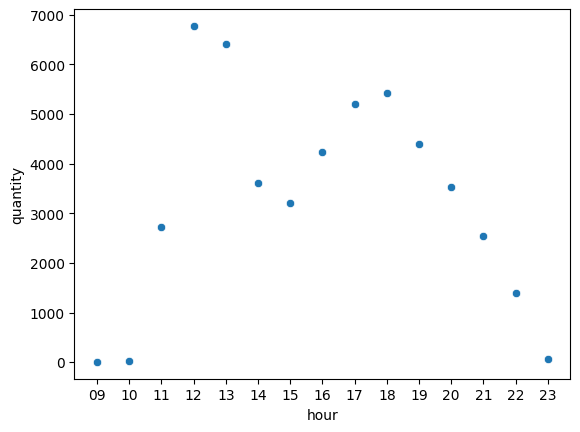

In [596]:
sns.scatterplot(data = quantity_hour_grouped, x="hour", y="quantity")

#### We can see that during 12 and 1 pm, which are lunch times are the busiest hour.
#### The slowest times of the day is 9 am and 11 pm, this could be because its slow during opening hour and closing hours.
#### Knowing that the busiest hours are 12pm,1pm and 6pm, we can use this info to have more employees working during those hours.

In [597]:
# How much money was generated per hour?
money_generated_by_hour = maven.groupby("hour", as_index=False)["price"].sum()
money_generated_by_hour

,hour,price
0,09,83.00
1,10,285.70
2,11,43978.80
3,12,108047.75
4,13,102550.95
5,14,57650.20
6,15,52231.30
7,16,69129.40
8,17,85128.10
9,18,88334.20


## Graphing to show if the quantity ordered was similar to the money generated by hour

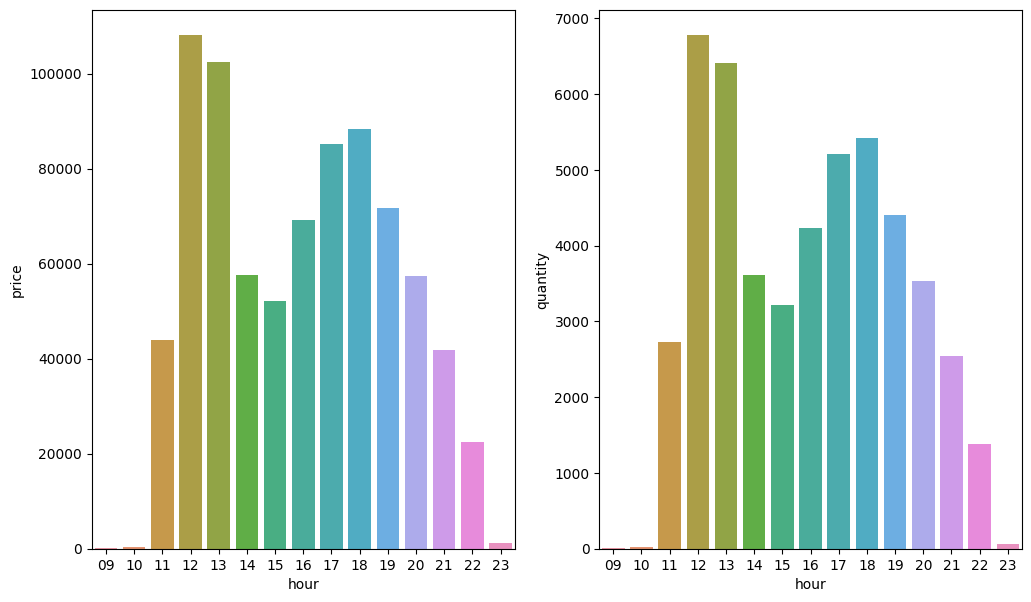

In [598]:
f, axes = plt.subplots(1,2, figsize=(12,7))
s1 = sns.barplot(data=money_generated_by_hour, x= "hour", y="price", ax=axes[0])
s2 = sns.barplot(data = quantity_hour_grouped, x="hour", y="quantity", ax= axes[1])

# Which was the best and worst pizzas?

### We have to ask the stakeholder if they mean best in terms of most ordered pizza or in terms of money generated?

In [599]:
# Sorting the table in descending order from most sold pizza to least sold pizza.
pizza_quantity = maven.groupby("name", as_index=False)["quantity"].sum()
pizza_quantity.sort_values("quantity", ascending=False)

,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371
4,The California Chicken Pizza,2370
23,The Sicilian Pizza,1938
26,The Spicy Italian Pizza,1924
25,The Southwest Chicken Pizza,1917
1,The Big Meat Pizza,1914


In [600]:
# What are the names of the best and worst selling pizza and how many was sold?
print(pizza_quantity[pizza_quantity["quantity"]==pizza_quantity["quantity"].max()])
print(pizza_quantity[pizza_quantity["quantity"]==pizza_quantity["quantity"].min()])

                       name  quantity
7  The Classic Deluxe Pizza      2453
                   name  quantity
2  The Brie Carre Pizza       490


# Sort the name of the pizza in descending order based on how much money they generated.

In [601]:
most_money_made_by_pizza= maven.groupby("name", as_index=False)["price"].sum()
most_money_made_by_pizza.sort_values(by="price", ascending=False)

,name,price
30,The Thai Chicken Pizza,42332.25
0,The Barbecue Chicken Pizza,41683.00
4,The California Chicken Pizza,40166.50
7,The Classic Deluxe Pizza,37631.50
26,The Spicy Italian Pizza,34163.50
25,The Southwest Chicken Pizza,34081.75
14,The Italian Supreme Pizza,32856.25
12,The Hawaiian Pizza,31561.75
9,The Four Cheese Pizza,31361.10
23,The Sicilian Pizza,30123.75


In [602]:
# Which pizza generated the most money?
most_money_made_by_pizza[most_money_made_by_pizza["price"]==most_money_made_by_pizza["price"].max()]

,name,price
30,The Thai Chicken Pizza,42332.25


In [603]:
# Which pizza generated the least money?
most_money_made_by_pizza[most_money_made_by_pizza["price"]==most_money_made_by_pizza["price"].min()]

,name,price
2,The Brie Carre Pizza,11352.0


#### If we meant best pizza in terms of most quantity ordered then the best pizza was The Classic Deluxe Pizza, however The Thai Chicken Pizza generate the most sales.
#### The least sold pizza and the pizza that generated the least sales was the The Brie Carre Pizza

# How much does an average pizza cost?

In [604]:
print("The Average pizza cost $", round(maven["price"].mean(),2),)


The Average pizza cost $ 16.49


# What was the top pizzas during the busiest hour?

In [605]:
pizza_during_12 = maven[maven["hour"]=="12"]
pizza_during_12

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,year,month,day,hour,minutes,second
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,01,02,12,22,46
5,314,2015-01-06,12:11:58,716,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,01,06,12,11,58
7,377,2015-01-07,12:03:18,856,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,01,07,12,03,18
17,1559,2015-01-27,12:34:12,3507,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,01,27,12,34,12
20,1675,2015-01-29,12:26:53,3771,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,01,29,12,26,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48601,20463,2015-12-14,12:36:01,46591,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015,12,14,12,36,01
48602,20513,2015-12-15,12:08:00,46713,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015,12,15,12,08,00
48603,20514,2015-12-15,12:14:37,46716,brie_carre_s,2,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015,12,15,12,14,37
48606,20648,2015-12-17,12:56:35,46987,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",2015,12,17,12,56,35


In [606]:
# Grouping the table by name then sorting it in descending order based on quantity
quantity_12hour = pizza_during_12.groupby(["name"],as_index=False)["quantity"].sum().sort_values(by="quantity", ascending=False)
quantity_12hour

,name,quantity
20,The Pepperoni Pizza,348
7,The Classic Deluxe Pizza,337
4,The California Chicken Pizza,327
0,The Barbecue Chicken Pizza,325
12,The Hawaiian Pizza,319
30,The Thai Chicken Pizza,315
9,The Four Cheese Pizza,301
1,The Big Meat Pizza,291
23,The Sicilian Pizza,269
26,The Spicy Italian Pizza,259


In [607]:
# Which pizza and it's size was ordered the most during 12pm (busiest hour of the day).
quantity_12hour[quantity_12hour["quantity"]==quantity_12hour.quantity.max()]

,name,quantity
20,The Pepperoni Pizza,348


In [608]:
# Which pizza and it's size was ordered the least during 12pm (busiest hour of the day).
quantity_12hour[quantity_12hour["quantity"]==quantity_12hour.quantity.min()]

,name,quantity
2,The Brie Carre Pizza,84


In [609]:
most_sales_12hour = pizza_during_12.groupby(["name"],as_index=False)["price"].sum().sort_values(by="price", ascending=False)
most_sales_12hour

,name,price
4,The California Chicken Pizza,5462.75
30,The Thai Chicken Pizza,5458.50
0,The Barbecue Chicken Pizza,5406.00
7,The Classic Deluxe Pizza,5167.00
9,The Four Cheese Pizza,4838.05
26,The Spicy Italian Pizza,4604.00
25,The Southwest Chicken Pizza,4390.25
14,The Italian Supreme Pizza,4259.00
20,The Pepperoni Pizza,4193.00
12,The Hawaiian Pizza,4108.50


## Graphing to see if the most ordered pizza generated most sales during 12pm.

In [610]:
top10_quantity=quantity_12hour.sort_values(by="name")
top10_price = most_sales_12hour.sort_values(by="name")

In [611]:
top10_quantity_12=top10_quantity.head(15)
top10_price_12 = top10_price.head(15)

## Graphing to see if pizza quantity sold and the sales are similar for pizza sold during 12pm. 

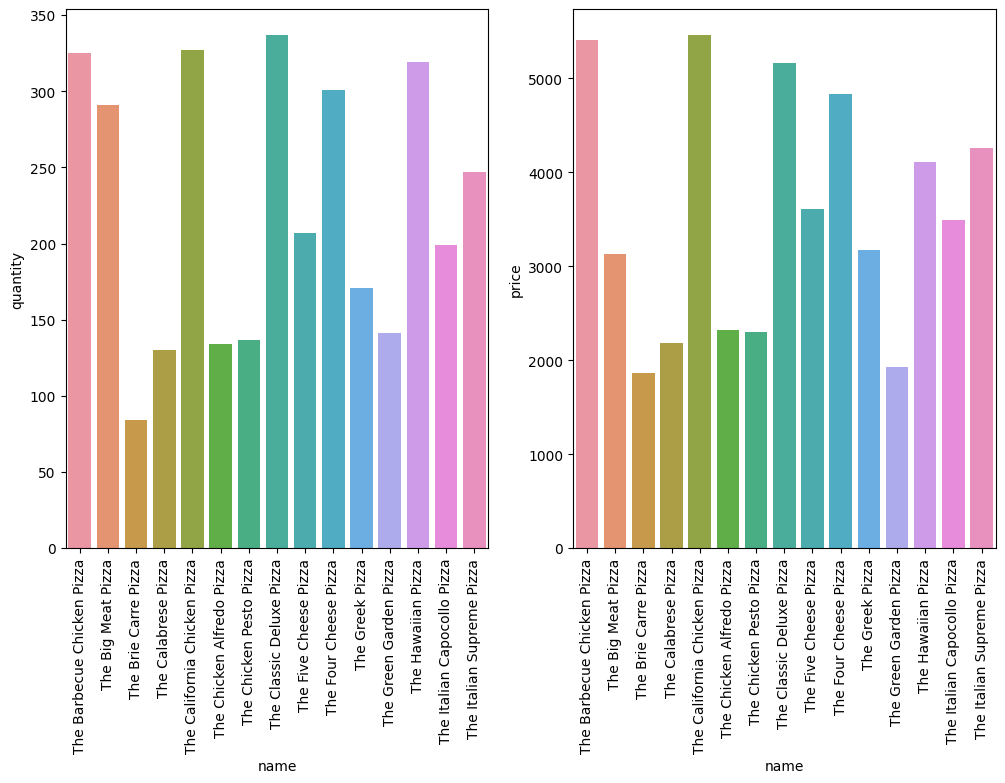

In [612]:
f, hour12 = plt.subplots(1,2, figsize=(12,7))
h1= sns.barplot(data=top10_quantity_12, x= "name", y="quantity", ax=hour12[0])
h2= sns.barplot(data=top10_price_12 , x= "name", y="price", ax=hour12[1])
plt.setp(h1.get_xticklabels(), rotation=90)
plt.setp(h2.get_xticklabels(), rotation=90)
plt.show()

#### We can see that most of the pizza's sales align with the quantity sold except The Big Meat Pizza

# Which sizes are the most popular during the top 3 busiest hours?

In [613]:
# Quantity by size during 12pm
pizza_during_12.groupby("size", as_index=False)["quantity"].sum()

,size,quantity
0,L,2633
1,M,2132
2,S,1953
3,XL,55
4,XXL,3


In [614]:
# Quantity by size during 13pm, which equals 1pm.
pizza_during_13 = maven[maven["hour"]=="13"]
pizza_during_13.groupby("size", as_index=False)["quantity"].sum()

,size,quantity
0,L,2498
1,M,2032
2,S,1812
3,XL,69
4,XXL,2


In [615]:
# Quantity by size during 18pm, which equals 6pm.
pizza_during_18 = maven[maven["hour"]=="18"]
pizza_during_18.groupby("size", as_index=False)["quantity"].sum()

,size,quantity
0,L,2070
1,M,1679
2,S,1598
3,XL,65
4,XXL,5


#### We can see that all top three hours have the same size order in term of quantity ordered.
#### For all three hours the most popular size is Large and the least popular is extra extra large. 

# Distribution of the the price

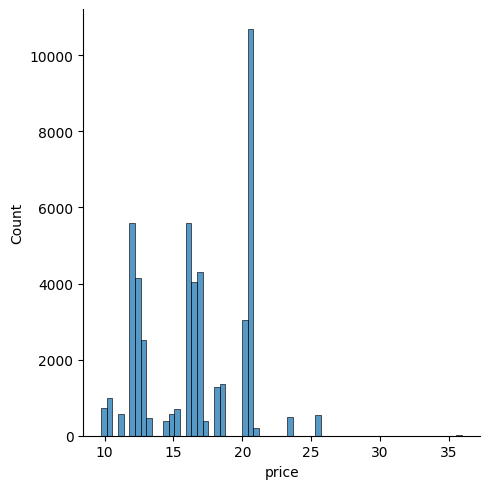

In [616]:
sns.displot(data=maven.price)